In [1]:
import trainer as tr
import os
import matplotlib.pyplot as plt
import model.utils.utility as utils
from torch.utils.data import DataLoader
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

N_EPOCHS = 950
P = 20
N = 3
BATCH_SIZE = 64
TECHNIQUE = 'jigen'
P_THRESHOLD = 0.5
IoU_THRESHOLD = 0.65
FULL_DATA=False

In [2]:
# JiGen
trainer = tr.JigenTrainer(n_epochs=N_EPOCHS, P=P, N=N, batch_size=BATCH_SIZE)
data, phase = tr.get_jigen_data(P=P, batch_size=BATCH_SIZE, full_data=FULL_DATA)
if phase == 'train':
    trainer.train(**data)

In [3]:
model = data['model']
test_data = tr.JiGenData(P=P, mode='test',split=[0.6, 0.1, 0.3])
dataloader_test = DataLoader(test_data, batch_size=1, shuffle=True)
accuracy_t_IoU, accuracy_IoU, dice_score, sensitivity, specificity = trainer.evaluate(dataloader_test,
                                                                                      model,
                                                                                      p_threshold=P_THRESHOLD,
                                                                                      T=IoU_THRESHOLD)

  0%|          | 0/809 [00:00<?, ?it/s]C:\Users\Noisecape\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [4]:
print(f'Thresholded_IoU {accuracy_t_IoU:.2f}')
print(f'IoU {accuracy_IoU:.2f}')
print(f'Dice Score {dice_score:.2f}')
print(f'Sensitivity {sensitivity:.2f}')
print(f'Specificity {specificity:.2f}')

Thresholded_IoU 0.89
IoU 0.90
Dice Score 0.94
Sensitivity 0.95
Specificity 0.97


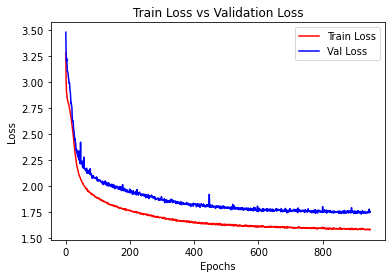

In [5]:
def plot_train_val_history(epoch, loss_history, val_history):
    plt.plot([el for el in range(epoch)], loss_history[:epoch], 'r', label='Train Loss')
    plt.plot([el for el in range(epoch)], val_history[:epoch], 'b', label='Val Loss')
    plt.title('Train Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

path = './saved_models/jigen_checkpoint.pth'
epoch, loss_history, val_history = utils.get_train_history(path=path)
plot_train_val_history(epoch, loss_history, val_history)